# Exploration of Flight Data
## by Parida

## Preliminary Wrangling

> This dataset reports flights in the United States for 2008, it consists of various columns related to delay and cancellation of flights. 
> Data source link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Loading the dataset
flights_data = pd.read_csv('2008.csv')

In [3]:
flights_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [4]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [6]:
#taking a sample of the dataset to reduce the size of dataset
flights_data = flights_data.sample(frac=.02)


In [7]:
flights_data.shape


(47784, 29)

In [8]:
#deleting the duplicate rows
print(flights_data.duplicated().sum())
flights_data = flights_data.drop_duplicates()

0


In [9]:
#making copy of dataset before performing the analysis
flights_data = flights_data.copy()

### What is the structure of your dataset?

> The dataset has 47784 rows and 29 columns.

### What is/are the main feature(s) of interest in your dataset?

> I will be focussing on the cancelled and delayed flights.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Distance, Weather, CarrierDelay

## Univariate Exploration


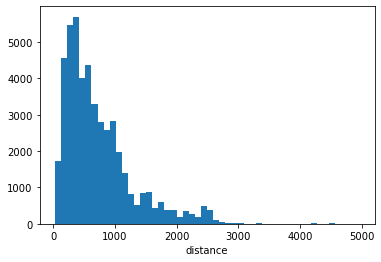

In [10]:
#looking at the distribution of distance
plt.hist(data = flights_data, x = "Distance", bins = 50)
plt.xlabel("distance");

In [11]:
#We can see that the plot is right skewed. 
#looking at data where distance>3500
flights_data[ flights_data.Distance > 3500].sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1173607,2008,2,13,3,1006.0,1005,1432.0,1505,DL,1273,...,3.0,32.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2261683,2008,4,4,5,1522.0,1210,1820.0,1540,AA,7,...,6.0,11.0,0,NaN,0,142.0,0.0,0.0,0.0,18.0
1789203,2008,3,16,7,1000.0,1000,1406.0,1355,DL,1273,...,4.0,35.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2261731,2008,4,22,2,1733.0,1735,544.0,555,AA,8,...,6.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
218357,2008,1,14,1,1733.0,1731,529.0,525,UA,2,...,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


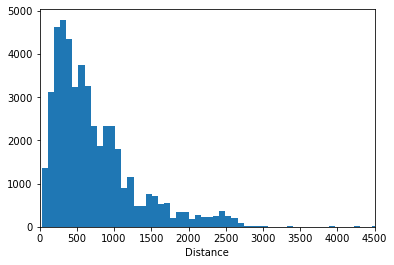

In [12]:
# looking at the data in the x-range bwtween 0 and 3500.
plt.hist(data=flights_data, x="Distance", bins=60)
plt.xlabel("Distance")
plt.xlim([0,4500]);

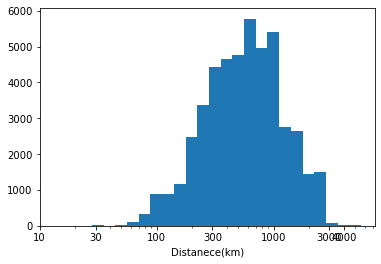

In [13]:
#since there is a tail on right, lets take log scale

bin = 10 ** np.arange(np.log10(flights_data.Distance.min()), np.log10(flights_data.Distance.max())+0.1, 0.1)
plt.hist(data=flights_data, x="Distance", bins=bin)
plt.xscale("log")
plt.xlabel("Distanece(km)")
plt.xticks([10,30,100,300,1000,3000,4000],[10,30,100,300,1000,3000,4000]);

> Distance has a right skewed distribution, with a lot of flights on the short distance end, and a few on the long distance end. When plotted on a log-scale, the distance distribution looks roughly normal distribution. The flights become limited when the distance increases(more than 3000)

## ArrDelay

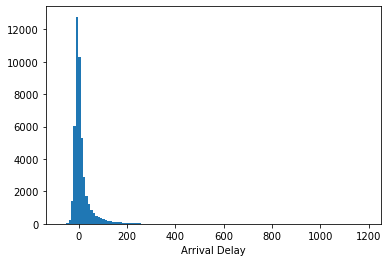

In [14]:
plt.hist(data=flights_data, x="ArrDelay", bins=np.arange(flights_data.ArrDelay.min(),flights_data.ArrDelay.max()+10,10) )
plt.xlabel("Arrival Delay");

In [15]:
#the extremely high values can be outliers
flights_data[(flights_data.ArrDelay > 700) ]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
483569,2008,1,25,5,944.0,1640,1202.0,1850,AA,401,...,10.0,14.0,0,NaN,0,1024.0,0.0,8.0,0.0,0.0
1706684,2008,3,7,5,917.0,1345,1232.0,1650,AA,2228,...,20.0,22.0,0,NaN,0,1172.0,0.0,10.0,0.0,0.0
2248761,2008,4,10,4,1032.0,1829,1309.0,2045,9E,4751,...,6.0,53.0,0,NaN,0,963.0,0.0,21.0,0.0,0.0
2182898,2008,4,4,5,2117.0,730,2338.0,925,MQ,3838,...,4.0,55.0,0,NaN,0,827.0,0.0,26.0,0.0,0.0


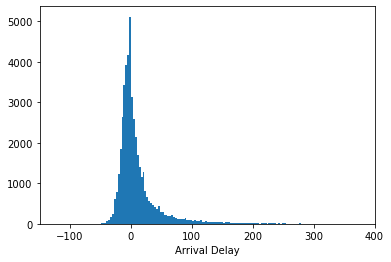

In [16]:
#lets change the bin size and look at it again
plt.hist(data=flights_data, x="ArrDelay", bins=400)
plt.xlabel("Arrival Delay")
plt.xlim([-150,400]);

> Arrdelay distribution is right skewed and mode is around 0. There are flew flights which arrived before their time

## Dep Delay

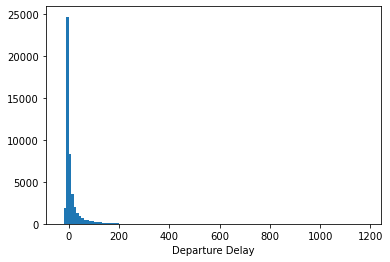

In [17]:
#plotting the Departure Delay
plt.hist(data=flights_data, x="DepDelay",bins=np.arange(flights_data.DepDelay.min(),flights_data.DepDelay.max()+10,10))
plt.xlabel("Departure Delay");

In [18]:
#looking for outliers on left
outlier_data = flights_data[flights_data.DepDelay < 0]
outlier_data['DepDelay']

905664    -1.0
2075114   -8.0
419454    -9.0
2106413   -4.0
1760645   -7.0
          ... 
578484    -3.0
901194    -2.0
1284078   -6.0
1629584   -4.0
2188365   -1.0
Name: DepDelay, Length: 22931, dtype: float64

In [19]:
#looking for outliers on right
outlier_data = flights_data[flights_data.DepDelay > 1000]
outlier_data


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
483569,2008,1,25,5,944.0,1640,1202.0,1850,AA,401,...,10.0,14.0,0,NaN,0,1024.0,0.0,8.0,0.0,0.0
1706684,2008,3,7,5,917.0,1345,1232.0,1650,AA,2228,...,20.0,22.0,0,NaN,0,1172.0,0.0,10.0,0.0,0.0


In [20]:
#removing outlier on the right
flights_data = flights_data[(flights_data.DepDelay < 1000)]


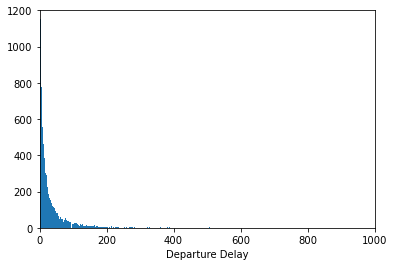

In [21]:
# plotting the histgram again
plt.hist(data=flights_data, x="DepDelay",bins=1000)
plt.xlabel("Departure Delay")
plt.xlim([0,1000])
plt.ylim([0,1200]);

> The distribution of the delay of departure time is right skewed and the mode is around 0 minutes.

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


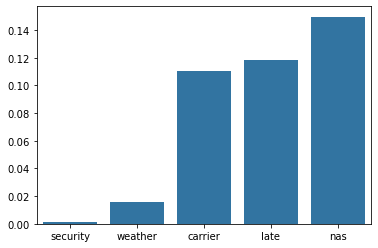

In [22]:
# The proportion where each type of delay occurs.
delay_car = flights_data[(~flights_data.CarrierDelay.isnull()) & (flights_data.CarrierDelay!=0)].shape[0] / flights_data.shape[0]
delay_weather = flights_data[(~flights_data.WeatherDelay.isnull()) & (flights_data.WeatherDelay!=0)].shape[0] / flights_data.shape[0]
delay_nas = flights_data[(~flights_data.NASDelay.isnull()) & (flights_data.NASDelay!=0)].shape[0] / flights_data.shape[0]
delay_sec = flights_data[(~flights_data.SecurityDelay.isnull()) & (flights_data.SecurityDelay!=0)].shape[0] / flights_data.shape[0]
delay_late = flights_data[(~flights_data.LateAircraftDelay.isnull()) & (flights_data.LateAircraftDelay!=0)].shape[0] / flights_data.shape[0]

delays = pd.Series([delay_car,delay_weather,delay_nas,delay_sec,delay_late], index=["carrier","weather","nas","security","late"]).sort_values(ascending=True)
sb.barplot(delays.index, delays, color=sb.color_palette()[0]);

> We can see that most of the delays are because of late aircraft, then carrier delays and then NAS delays (minute difference between them). Then we have weather delays and few security delays
>
> The Distance, Arrival Delay and Departure Delay all have right skewed distributions. From the distribution of Arrival Delay, we see that many flights reached before their scheduled time.
>
> Removed observation where departure delay is more than 1000

## Bivariate Exploration

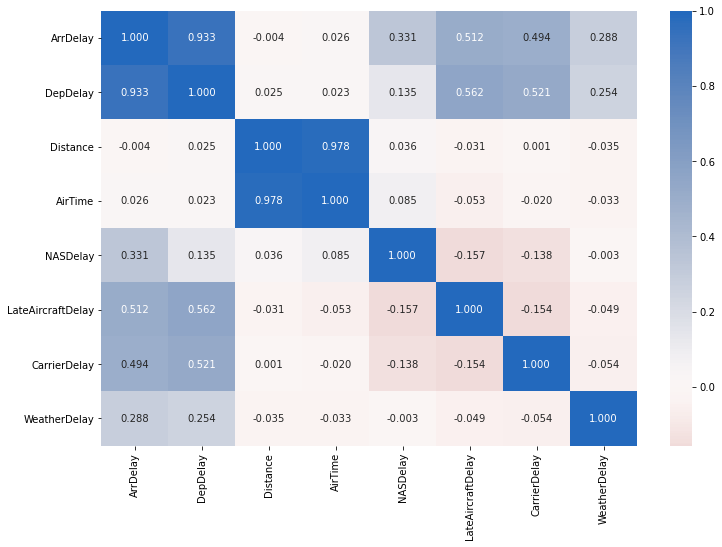

In [23]:
#lets first look at pair wise correlations present between the features of the dataset
numeric_vars = ["ArrDelay","DepDelay","Distance","AirTime","NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]
categoric_var = []
# correlation plot
plt.figure(figsize=[12,8])
sb.heatmap(flights_data[numeric_vars].corr(), annot=True, fmt=".3f", cmap="vlag_r", center=0);

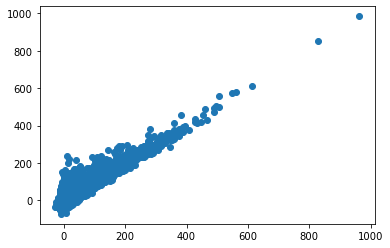

In [24]:
#relationship between arrival and departure delays
plt.scatter(data=flights_data, x='DepDelay', y='ArrDelay')
plt.show()


> There is a strong positive relationship between the two

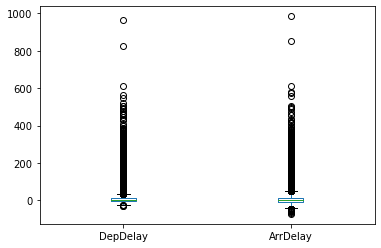

In [27]:
#boxplot of arrival and departure delays
flights_data.loc[:,['DepDelay', 'ArrDelay']].plot.box();

> From above we see there are a few outliers but we do not need to remove any, since we already did


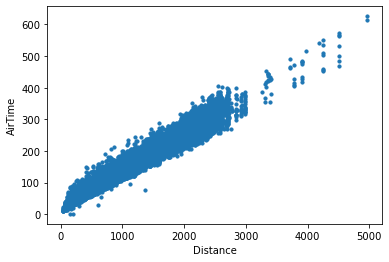

In [25]:
#distance vs air time
plt.scatter(data=flights_data, x="Distance", y="AirTime", s=10)
plt.xlabel("Distance") 
plt.ylabel("AirTime");

> we see that as the distance increases the air time increases which is the expected behaviour

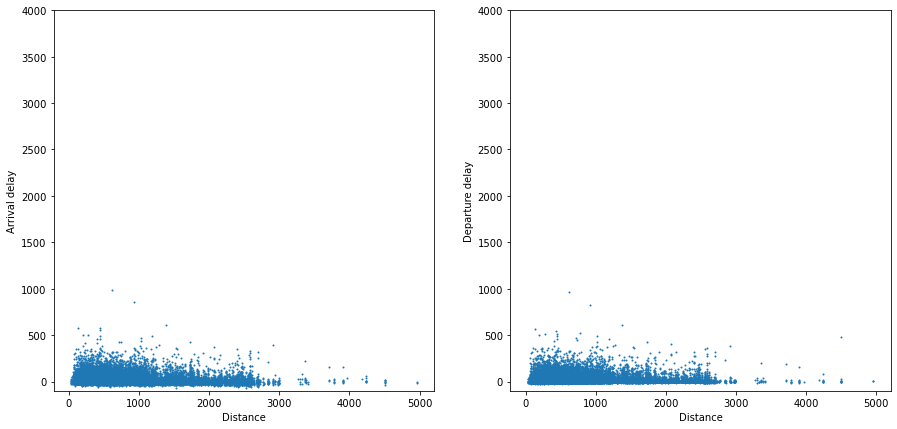

In [28]:
#distance vs arrival delay and distance vs departure delay

plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
plt.scatter(data=flights_data, x="Distance", y="ArrDelay", s=1)
plt.xlabel("Distance")
plt.ylabel("Arrival delay")
plt.ylim([-100,4000]);

plt.subplot(1,2,2)
plt.scatter(data=flights_data, x="Distance", y="DepDelay", s=1)
plt.xlabel("Distance")
plt.ylabel("Departure delay")
plt.ylim([-100,4000]);

> we see that both arrival and departure delays are lesser when the distance increases to a large extent

> There is a positive relationship between arrival and departure delays and distance and air time. there is no significant relationship between departure delays/arrival delays and distance.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

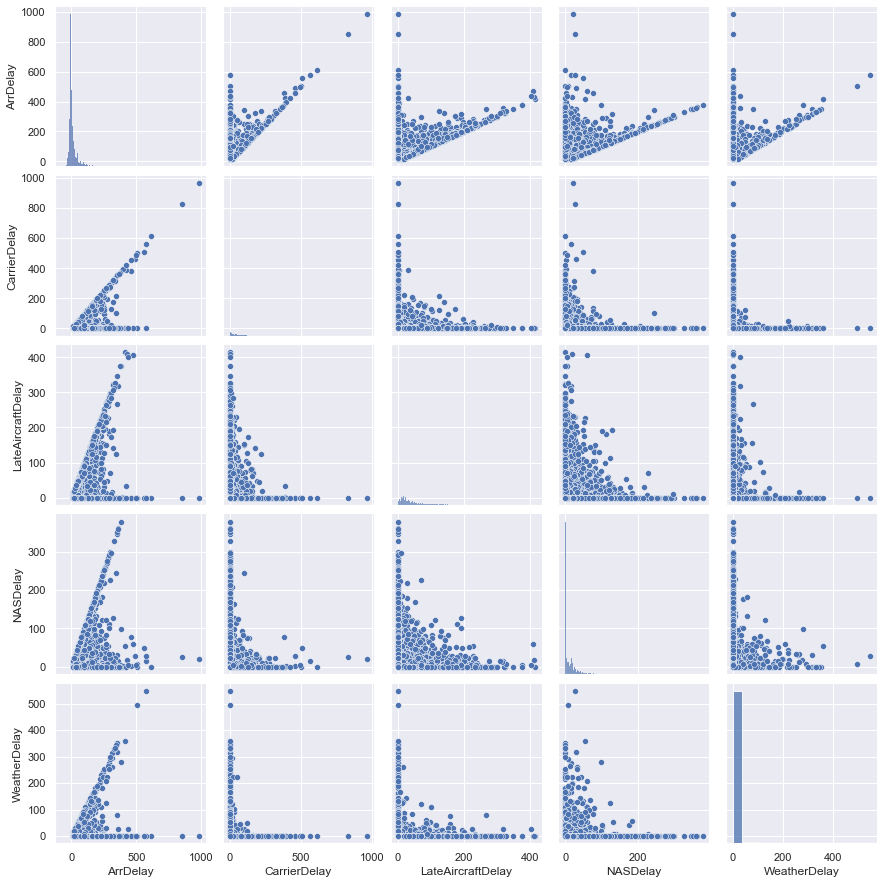

In [30]:
#scatterplot between types of delays
sb.set()
delay_cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sb.pairplot(flights_data[delay_cols], height = 2.5)
plt.show()

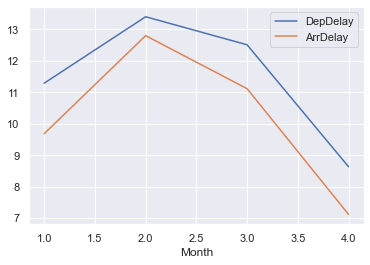

In [31]:
#delays by month
flights_data.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.show()

> We see that arriaval delay is least in october month and same goes with departure delay. Both arrival and departure delays are highest in December

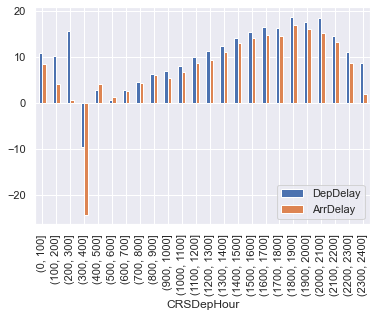

In [32]:
#relation between time and arrival and departure delays
flights_data['CRSDepHour'] = pd.cut(flights_data.CRSDepTime, list(range(0, 2500, 100)))
flights_data.groupby('CRSDepHour').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar()
plt.show()

> best time to fly in morning

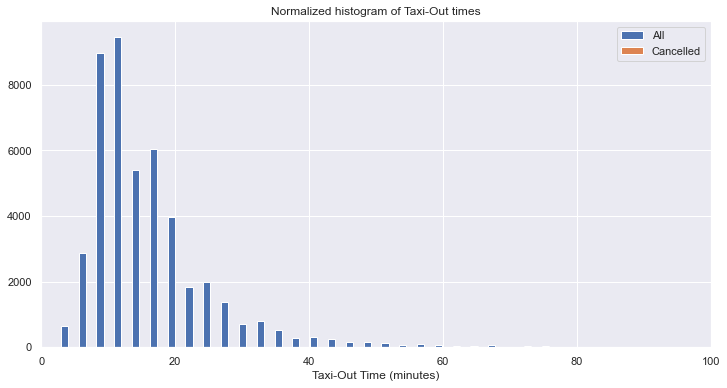

In [33]:
#taxi out times for all flights vs cancelled flights
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([flights_data['TaxiOut'], cancelled['TaxiOut']], bins=100, label=['All', 'Cancelled'])

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show();


> no taxi out times for cancelled flights.

In [34]:
# lets make subset of the main dataframe which has 4 columns, delay type, delay time, DepDelay, distance

sub_set = pd.DataFrame()
delay_types = ["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay","SecurityDelay"]

for type in delay_types:
    sub = pd.DataFrame()
    sub["time"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())][type]
    sub["DepDelay"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["DepDelay"]
    sub["ArrDelay"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["ArrDelay"]
    sub["Distance"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["Distance"]
    sub["type"] = type
    sub_set = sub_set.append(sub)

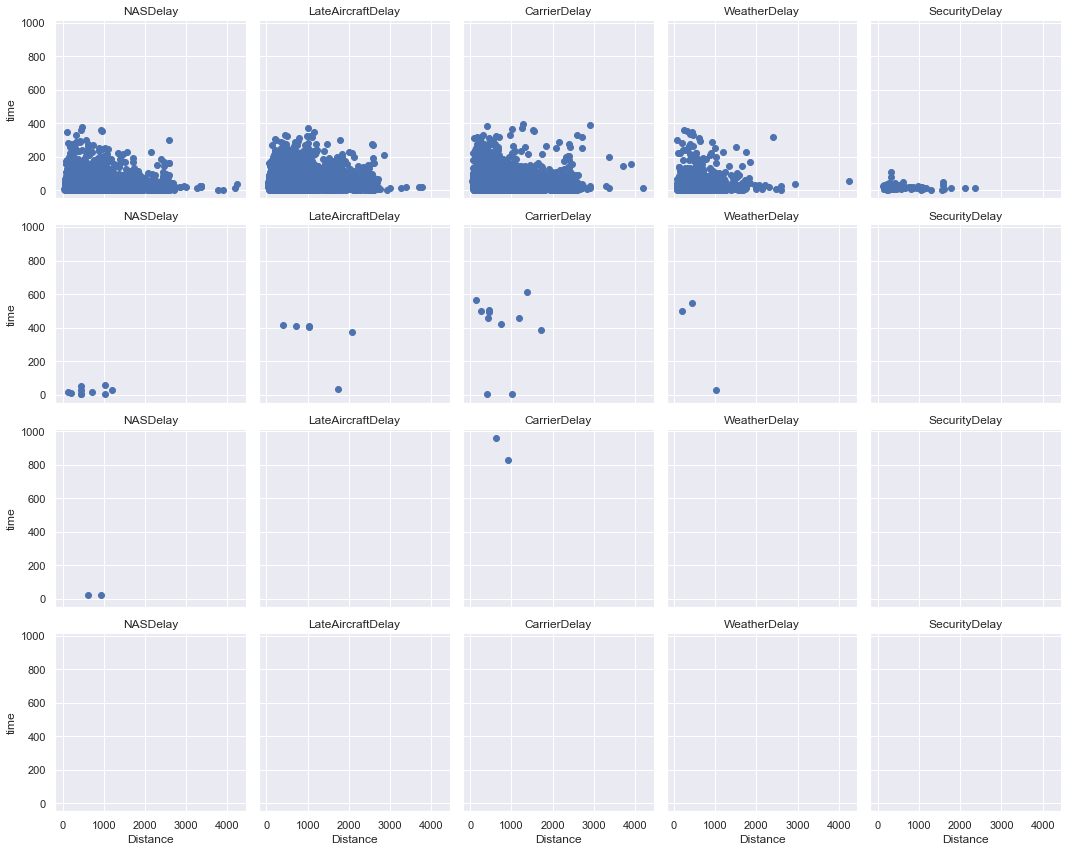

In [35]:
#relationship between departure delays and all delays
bin_edges = np.arange(0,2000,400)
sub_set["dep_delay"] = pd.cut(sub_set.DepDelay, bin_edges, right=False, include_lowest=True)
h = sb.FacetGrid(data=sub_set, row="dep_delay", col="type" )
h.map(plt.scatter, "Distance", "time")
h.set_titles('{col_name}');


> carrier delay most affected by departure delays

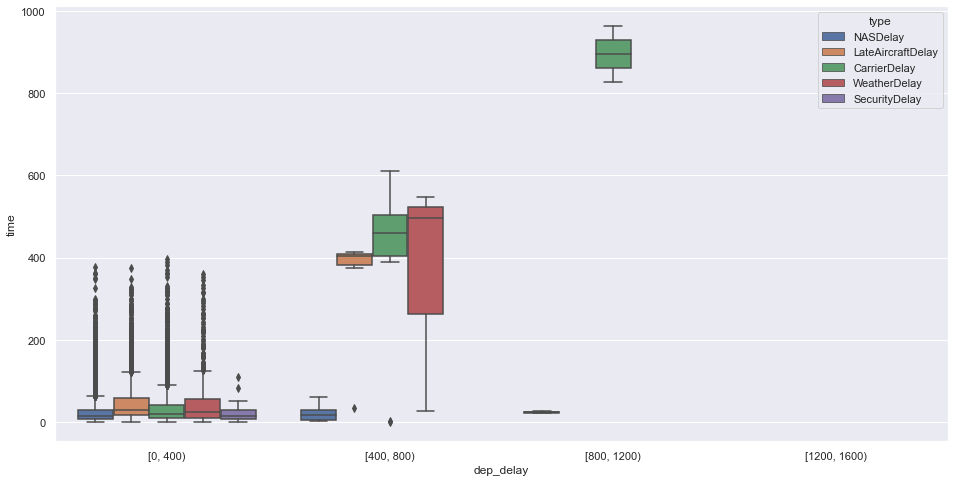

In [36]:
plt.figure(figsize=[16,8])
sb.boxplot(data=sub_set, hue="type", y="time", x="dep_delay");


> for carrier and late aircraft delay, we have longer the departure delay.

> We looked at relationship between various types of delays and the relationship between arrival delays/departure delays and month and days of week. We got some interesting insights from that.
> 
> taxi out times hass no significance with cancelled flights, carrier delay most affected by departure delays, weather delay has different tendencies from all other delays.